# **Software de manipulação de sequencias básico e bancos de dados**

Neste Notebook, iremos fazer o donwload e manipular algumas sequências nucleotídicas e de aminoácido utilizando o pacote `emboss` compilado pelo `conda`. Além disso, também vamos trabalhar com softwares de alinhamento e de extração de informações das sequências biológicas.

Utilizaremos principalmente os softwares listados abaixo.

*   **[EMBOSS](https://emboss.sourceforge.net/what/)** e os softwares implementados
*   **[ENTREZ](https://www.ncbi.nlm.nih.gov/Web/Search/entrezfs.html)** - pacote para interagir com o National Library of Medicine ([NCBI](https://www.ncbi.nlm.nih.gov))

## Antes de começarmos

Para poder salvar as alterações desse arquivo notebook no seu Drive:

Clique em Arquivo no canto superior esquerdo e selecione Salvar uma cópia no Drive.

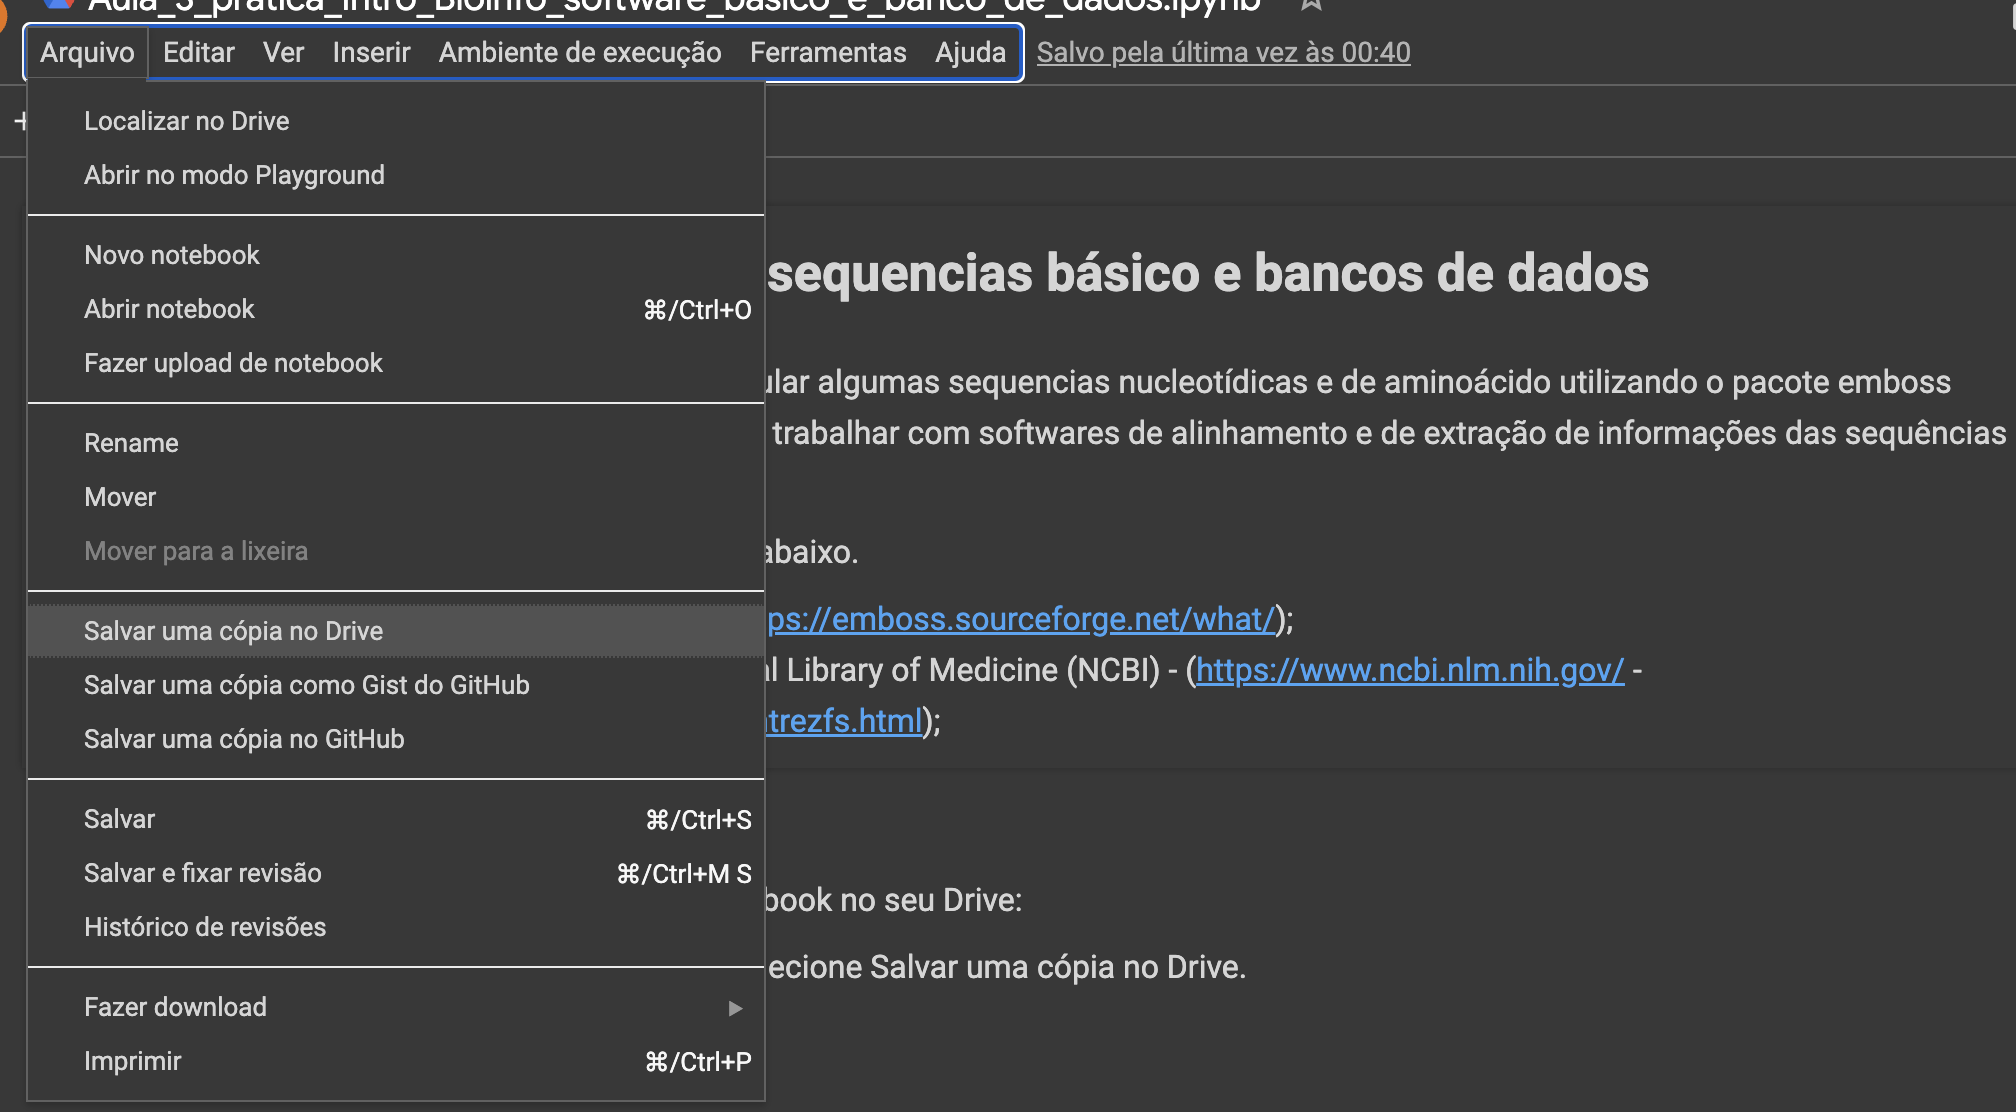

## Revisando conceitos

**Gene procariótico vs eucariótico**

[Clique aqui para ler mais](https://microbenotes.com/gene-a-comprehensive-guide/)

**Transcição e tradução:**

[Clique aqui para maiores informações](https://https://www.genome.gov/genetics-glossary/Translation)

**Quadro aberto de leitura**

[Clique aqui para maiores informações](https://pt.wikipedia.org/wiki/Quadro_de_Leitura)

### Arquivos onde as informações ficam hospedadas

GBK [Clique e veja o exemplo](https://www.ncbi.nlm.nih.gov/genbank/samplerecord/)

EMBL [Clique e veja o exemplo](https://ena-docs.readthedocs.io/en/latest/submit/fileprep/flat-file-example.html)

GFF [Clique e veja o exemplo](https://www.ensembl.org/info/website/upload/gff.html)

## Baixando o conjunto de dados a ser analisado e extrair informações básicas

Utilizaremos um conjunto de dados de genomas do vírus da Dengue para esta aula prática.

In [ ]:
!wget https://raw.githubusercontent.com/WallauBioinfo/intro-bioinfo/main/classes/day_3/resources/igm-train_denv.fasta

Checando o arquivo

In [ ]:
!head igm-train_denv.fasta

Caso você tenho optado por clonar o repositório poderá checar o arquivo com o comando abaixo:

In [ ]:
!head ./resources/igm-train_denv.fasta

Vamos obter o número de sequencias

In [ ]:
!cat igm-train_denv.fasta | grep -c '>'

ou

In [ ]:
!grep -c '>' igm-train_denv.fasta

## Instalando o conda/mamba e configurando o ambiente

In [ ]:
!pip install --upgrade --force-reinstall zstandard cuda-python
!pip install -q condacolab

!sed -i '/cudatoolkit/d' /usr/local/conda-meta/pinned

In [ ]:
import condacolab
condacolab.install()

Instalando o pacote de programa emboss

In [ ]:
!mamba install -c bioconda emboss --quiet

## Vamos utilizar algumas ferramentas interessantes?

*   infoseq	- Mostra informações simples sobre sequencias nucleotídicas e de aminoácido.
*   showfeat	- Mostra características de uma sequencia que possui informações de anotação.
*   extractseq	- Extrai regiões de uma sequencia baseado na anotação.
*   pepstats	- Mostra estatísticas de proteínas.


---



*   getorf - Procura e extrai regiões com quadro aberto de leitura (Open Reading Frame - ORFs).
*   sixpack - Mostra as 6 possibilidades de tradução de uma sequencia nucleotídica.
*   plotorf - Plota ORFs.
*   remap - Mostra a sequencias com sítios de restrição e tradução.


---




*   wossname	- Encontra programas do EMBOSS.

#### Agora podemos chamar cada software do EMBOSS diretamente

Neste primeiro momento, como de prache devido a centenas de softwares e parâmetros existentes nos softwares de bioinformática, vamos chamar o parâmetro help para entendermos as opções disponíveis no programa infoseq.

### Infoseq


O programa infoseq permite extrair informações básicas de um arquivo com sequencias nucleotídicas e/ou de amino ácido.

Algumas opções:

* -sequence Arquivo com sequencias nucleotídicas ou de amino ácido
* -outfile  Nome do arquivo de saída
* -html     Gerar uma tabela em formato HTML como saída
* -only     Delimitar quais colunas devem ser colocadas no arquivo de saída

Vamos chamar o manual do software infoseq

In [ ]:
!infoseq -help

Chamando o comando para imprimir na tela

In [ ]:
!infoseq -sequence sequencias_nucleotideos.fasta -only -name -type -length

Vamos agora imprimir em um arquivo

In [ ]:
!infoseq sequencias_nucleotideos.fasta -only -name -type -length -outfile sequencias_nucleotideos.info

In [ ]:
!infoseq sequencias_nucleotideos.fasta -only -name -type -length -html -outfile sequencias_nucleotideos_info.html

Vizualizando o arquivo

In [ ]:
!cat sequencias_nucleotideos.info
!echo
!cat sequencias_nucleotideos_info.html

#### E um arquivo com polipeptídeos/amino ácidos?

Chamando o comando para imprimir na tela

In [ ]:
!infoseq -sequence sequencias_aminoacidos.fasta -only -name -type -length

Vamos agora imprimir em um arquivo

In [ ]:
!infoseq sequencias_aminoacidos.fasta -only -name -type -length -outfile sequencias_aminoacidos.info

Imprimindo na tela

In [ ]:
!cat sequencias_aminoacidos.info

**Extraindo informações de outros formatos de arquivo que armazenam sequências e anotações**

Existem vários formatos de arquivos que carregam informações extras, além da sequência nucleotídica. Um dos formatos bem conhecidos é o [.gbk](https://www.ncbi.nlm.nih.gov/genbank/samplerecord/). Porém iremos utilizar um outro formato de arquivo que contém as anotações proveniente do [EMBL](https://ena-docs.readthedocs.io/en/latest/submit/fileprep/flat-file-example.html) (European Molecular Biology Laboratory).

### showfeat

O programa showfeat é usado para mostrar visualmente as anotações contidas em um arquivo de anotação genômica. Os arquivos mais usados para essa finalidade tem com extenssão o formato .GBK, .EMBL e .GFF.

Algumas opções:

* -sequence Nome do arquivo contendo sequencias + anotações.
* -outfile  Nome do arquivo de saída.
* -sort     Ordena o resultado por tipo de anotação.
* -jointfeatures Une as saídas do mesmo tipo de anotação.

Chamar o help

In [ ]:
!showfeat -help

Vamos usar um arquivo no formato embl

In [ ]:
!showfeat -sequence x65921.embl -outfile x65921.embl.showfeat

Visualizando a saída

In [ ]:
!cat x65921.embl.showfeat

Rodando o showfeat com saída ordenada

In [ ]:
!showfeat -sequence x65921.embl -sort Type -outfile x65921.embl.sort_showfeat

Vamos modificar o resultado passando alguns parâmetros

In [ ]:
!showfeat -joinfeat -pos -sequence x65921.embl -outfile x65921.embl.joint_showfeat

Imprimindo na tela

In [ ]:
!cat x65921.embl.showfeat
!cat x65921.embl.sort_showfeat
!cat x65921.embl.joint_showfeat

### extractfeat

O programa extractfeat é usado para extrair sequencias a partir de um arquivo que conteem sequencia e anotação.

Algumas opções:

* -sequence Nome do arquivo contendo sequencias + anotações.
* -outfile  Nome do arquivo de saída.
* -before   Número de bases a serem extraídas antes da anotação indicada.
* -after    Número de bases a serem extraídas depois da anotação indicada.  
* -sort     Ordena o resultado por tipo de anotação.
* -jointfeatures Une as saídas do mesmo tipo de anotação.

Vamos visualizar os parâmetros

In [ ]:
!extractfeat --help

Extraindo somente of exons

In [ ]:
!extractfeat -sequence x65921.embl -type exon -outseq x65921.embl_exon

Agora vamos extrair os exons mais 5 bases para cada lado

In [ ]:
!extractfeat -sequence x65921.embl -type exon -before 5 -after 5 -outseq x65921.embl_exon_5plusandminus

Vamos extrair agora toda a região de exon combinada

In [ ]:
!extractfeat x65921.embl -type CDS -join x65921.embl_CDS_join

Vamos extrair agora toda a região codificante combinada

In [ ]:
!extractfeat x65921.embl -type CDS -join x65921.embl_exon_join

Lendo os outputs

In [ ]:
!cat x65921.embl_exon
!echo
!cat x65921.embl_exon_5plusandminus
!echo
!cat x65921.embl_exon_join
!echo
!cat x65921.embl_CDS_join

#### Chegou a hora de você praticar


1º - Agora extraia somente o tipo de anotação "mRNA" e junte os arquivos de sequência.

In [ ]:
# Resposta da primeira tarefa


2º - Agora faça o mesmo mas extraia 50 bases antes do início e fim da sequencia completa do mRNA.

In [ ]:
#Resposta da segunda tarefa


### Pepstats

O programa pepstats é utilizado para extrair estatísticas das propriedades de uma ou múltiplas proteinas.

Algumas opções:

* -sequence Especificar o separador de campos.
* -outfile Impor ordenação numérica.

Chamando o manual do programa

In [ ]:
!pepstats -help

Vamos agora rodar o programa no arquivo com sequencias proteicas

In [ ]:
!pepstats -sequence sequencias_aminoacidos.fasta -outfile sequencias_aminoacidos.pepstats

Imprimindo o arquivo na tela

In [ ]:
!cat sequencias_aminoacidos.pepstats

### getorf

O é um programa para procurar quadros abertos de leitura em sequencias nucleotídicas.

* -sequence Arquivo com sequencias nucleotídicas.
* -outseq Nome do arquivo onde os resultados com as ORFs encontradas serão impresos.
* -table Versão da tabela de uso de códons de diferentes organismos.
* -minsize Tamanho mínimo em nucleotídeos da ORF.
* -maxsize Tamanha máximo em nucleotídeos da ORF.
* -find Valores de 0 à 6 que indicam como o resultado deve ser impresso (ex. tradução entre codon de início e parada, bases entre codons de parada etc).
* -methionine Reportar somente codons de início que comecem com Metionina.
* -circular Procurando ORFs em sequencias circulares.

Chamando o manual para ver as opções disponíveis

In [ ]:
!getorf -help

Extraindo as ORFs em ambos os sentidos da fita com tamanho minimo da ORF de 300 bases

In [ ]:
!getorf -sequence x65921.embl -minsize 300 -outseq x65921.embl.orf

Extraindo ORFs de outro conjunto de sequências

In [ ]:
!getorf -sequence sequencias_nucleotideos.fasta -minsize 300 -outseq sequencias_nucleotideos.fasta.orf

Imprimindo na tela

In [ ]:
!cat x65921.embl.orf
!cat sequencias_nucleotideos.fasta.orf

#### Vamos praticar?!

Usando a sequencia com anotação x65921.embl:

1º - Extraia as ORFs começando com o aminoácido Metionina.

In [ ]:
#Resposta da primeira tarefa



2º - Extraia as sequencias nucleotídicas dessas ORFs.

In [ ]:
#Resposta da segunda tarefa


### sixpack

O programa sixpack exibe os seis quadros de leitura de uma sequencia nucleotídica e os aminoácidos correspondentes de cada codon.

Algumas opções:

* -sequence Nome do arquivo com as seqeuncias nucleotídicas.
* -outfile Nome do arquivo de saída.
* -outseq Formato do arquivo de saída.
* -table Versão da tabela de uso de códons de diferentes organismos.
* -mstart Mostra somente ORFs que começam com Metionina.
* -orfminsize Tamanho mínimo da ORF em aminoácidos.

Chamando o manual do programa

In [ ]:
!sixpack -help

Extraindo ORFs e gerando uma saída gráfica

In [ ]:
!sixpack -sequence x65921.embl -outseq x65921.embl.fasta -outfile x65921.embl.sixpack

Imprimindo e comparando

In [ ]:
!cat x65921.embl.fasta
!cat x65921.embl.sixpack

#### Bora praticar!

Usando a sequencia e anotação x65921.embl:

1º Extraia somente ORFs maiores de 100 aminoácidos.

In [ ]:
# Responda aqui!

2º Extraia somente ORFs maiores de 300 bases que comecem com o aminoácido Metionina.

In [14]:
# Responda aqui!

### plotorf

O programa plotorf imprime um arquivo de figura contendo as ORFs encontradas.

Algumas opções:

* -sequence Nome do arquivo com as sequências nucleotídicas.
* -graph Formato do arquivo de saída.

Chamando o manual do programa

In [ ]:
!plotorf -help

Vamos gerar um plot

In [ ]:
!plotorf -sequence x65921.embl -graph pdf

**Como procurar um software dentro do EMBOSS por palavra-chave??**

### wossname

O wossname permite procurar programas dentro do pacote emboss utilizando palavras-chave.

Algumas opções:

* -search Padrão de busca.

Chamando o manual da função

In [ ]:
!wossname -help

Buscando programas

In [ ]:
!wossname -search transeq

## Baixando o genoma de referência a anotações através do Entrez/NCBI

O que é o Entrez? [Veja nesse link](https://www.ncbi.nlm.nih.gov/books/NBK25501/)

Criando ambiente para baixar o genoma de referência e anotações

In [ ]:
!mamba create -n entrez_ncbi
!mamba env list
!mamba install -c bioconda cmake entrez-direct --quiet
!mamba activate entrez_ncbi

Chamando o manual do esearch

In [ ]:
!esearch -h

In [ ]:
!esearch -db protein -query "mariner transposase aedes"

Chamando o manual do efetch

In [ ]:
!efetch -h

Buscando no banco de dados de nucleotídeos

In [ ]:
!esearch -db nucleotide -query NC_045512

Combinando os comandos

In [ ]:
!esearch -db nucleotide -query NC_045512 | efetch -format fasta > NC_045512.fa

Imprimindo na tela

In [ ]:
!cat NC_045512.fa

O que estamos buscando aqui?

In [ ]:
!esearch -db protein -query "mariner transposase aedes" | efetch -format fasta > mariner_transposase.fa

Imprindo na tela

In [ ]:
!cat mariner_transposase.fa

## **Créditos:**
Desenvolvido por Gabriel da Luz Wallau


